Importing the required packages

In [17]:

import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re
import sys
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
stop = set(stopwords.words("english"))
import warnings
warnings.filterwarnings('ignore')

Explore the data

In [18]:
data = pd.read_csv('Articles.csv', nrows=1000)
data.head()

,ID_Article,Path,publishingDate,Title,Body
0,1,Newsroom/User/Community,2012-05-26 03:00:19.23,Die Newsletter von derStandard.at,"<div class=""section"" id=""content-main"" itempro..."
1,2,Newsroom/User/Community/Regeln,2012-05-26 12:12:19.46,Werden Sie Teil von derStandard.at!,"<div class=""diashow"" id=""objectContent""><meta ..."
2,3,Diverses/mobil,2013-11-22 12:15:00.00,Die Android App von derStandard.at,"<div class=""section"" id=""content-main"" itempro..."
3,4,Newsroom/User/mitmachen/Mitreden,2014-08-13 05:30:00.00,Welche Erfahrungen haben Sie als Linkshänder g...,"<div class=""section"" id=""content-main"" itempro..."
4,5,Newsroom/User/mitmachen/Mitreden,2014-08-27 12:27:01.09,Wie haben Sie das Jahr 1989 erlebt?,"<div class=""section"" id=""content-main"" itempro..."


Removing stopwords

Text(0.5, 1.0, 'Title')

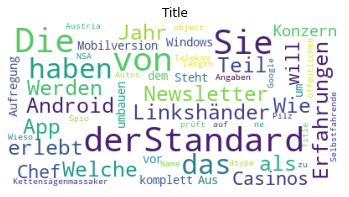

In [19]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Title']))


plt.imshow(wordcloud)
plt.axis('off')
plt.title("Title")

Text(0.5, 1.0, 'Body')

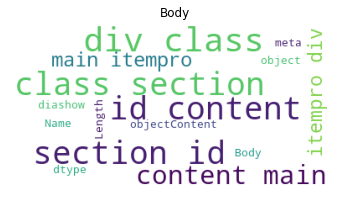

In [20]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Body']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Body')

Data Cleaning

In [21]:
%%timeit
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

data['Body'] = [cleaning(s) for s in data['Body']]
data['Title'] = [cleaning(s) for s in data['Title']]

613 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Model improvement

We can also use some parameters for vectorizer in scikit-learn and Machine learning model

In [22]:
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['Body'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)


k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(3):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 

cluster of words 0:
 die
 der
 prozent
 und
 div
 von
 das
 den
 im
 bei

cluster of words 1:
 der
 die
 div
 und
 mit
 class
 das
 den
 von
 strong

cluster of words 2:
 die
 der
 und
 das
 zu
 nicht
 es
 ist
 den
 strong



Building corpus from Title and Body

In [30]:
def build_corpus(data):
    
    corpus = []
    for col in ['Title', 'Body']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['die', 'newsletter', 'von', 'derstandard', 'at'],
 ['werden', 'sie', 'teil', 'von', 'derstandard', 'at', '']]

Words to Vector

In [31]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=400, workers=4)

In [33]:
model.wv['derstandard']

array([-0.68429387,  0.33181447, -0.06114345, -0.8650283 , -0.2979805 ,
        1.2813947 ,  1.2122172 ,  1.0434376 ,  0.962374  , -1.5237002 ,
        0.50726515,  0.6674524 , -0.9203994 ,  0.14907977,  0.6997977 ,
        1.5188109 ,  1.301021  , -0.93695104,  0.00858524, -1.0408098 ,
       -1.9290118 ,  0.10250536,  0.09486336,  0.2664873 , -0.9627305 ,
       -1.8138127 , -1.2130681 , -1.7251742 ,  0.6755257 ,  1.4586366 ,
       -1.0730019 ,  0.4616664 ,  1.6448702 , -1.0158248 ,  0.0109628 ,
        0.39664006,  0.10144418,  0.06478089,  0.2592298 ,  0.15125477,
       -0.23889384,  0.01028931, -0.64328325, -0.12123923, -2.0531266 ,
        0.14806293,  0.8612093 , -0.2357333 , -0.7927791 , -2.2460463 ,
        0.7971095 ,  0.4676836 , -0.6183168 , -0.56521314,  0.14476512,
       -0.7270785 , -1.5223113 ,  0.5748847 , -1.4370109 , -0.18272613,
       -0.3536863 , -1.2575134 ,  0.2437878 , -0.07438347, -1.0657756 ,
        0.34792733,  0.3121737 , -0.27538422,  1.2800695 ,  1.20

Data Visualization

In [35]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


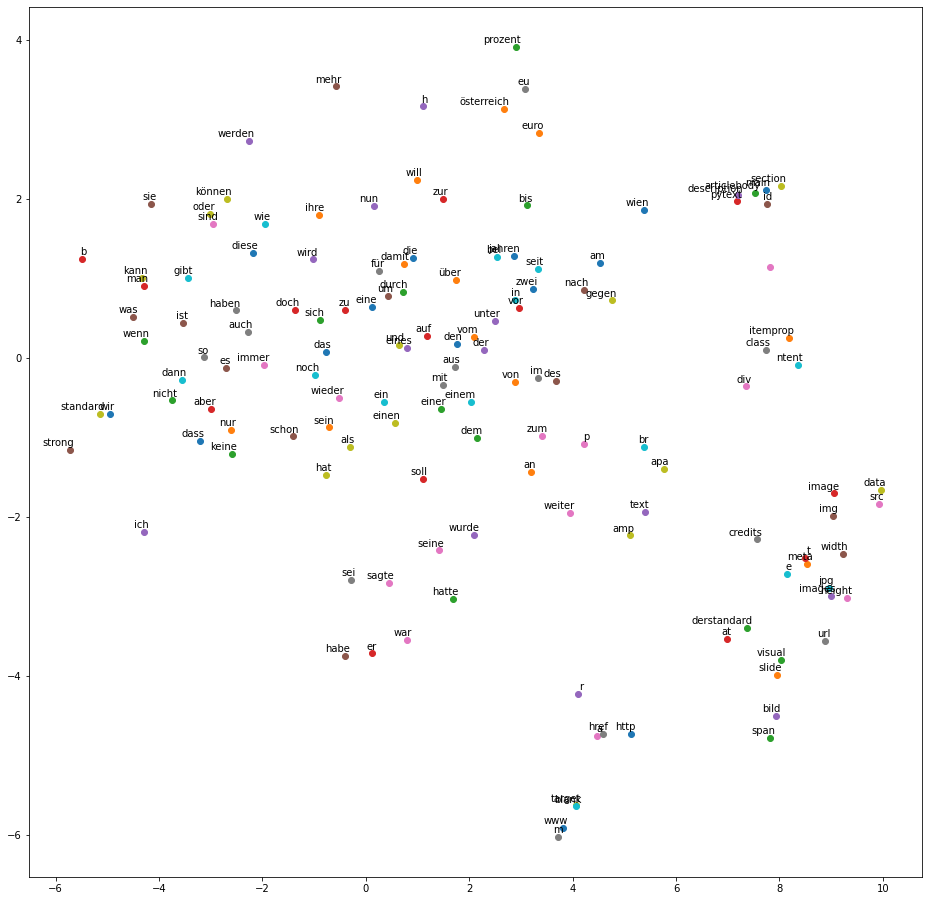

In [36]:
tsne_plot(model)